In [1]:
pip install numpy opencv-python matplotlib imageio


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt


📂 Dung lượng ảnh gốc: 76.06 kB
📏 Kích thước ảnh gốc: 1280 x 1280 pixels


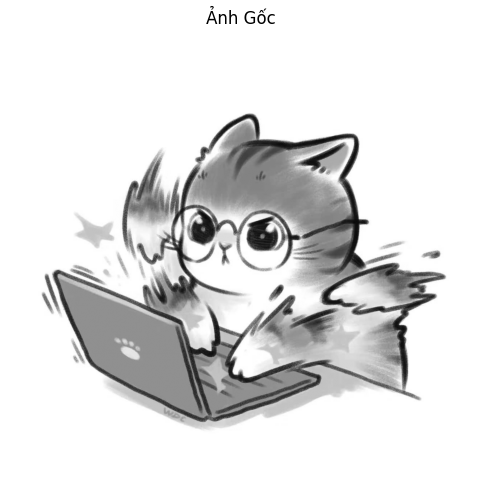

In [3]:
# Đọc ảnh và chuyển thành ảnh xám
image_path = os.path.join("img.jpg")
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE).astype(np.uint8)


# Kích thước ảnh gốc
m, n = image.shape
original_size = os.path.getsize(image_path)  # Dung lượng file gốc (bytes)
print(f"\n📂 Dung lượng ảnh gốc: {original_size / 1024:.2f} kB")
print(f"📏 Kích thước ảnh gốc: {m} x {n} pixels")

# Lưu ảnh gốc với tên "origin.jpg"
origin_path = r'C:\Users\anhkh\OneDrive\Desktop\ToanTriTueNhanTao\baocao\origin.jpeg'
cv2.imwrite(origin_path, image, [cv2.IMWRITE_JPEG_QUALITY, 90])

# Hiển thị ảnh gốc
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title("Ảnh Gốc")
plt.axis('off')
plt.show()


 10 Giá trị kỳ dị đầu tiên:
[295537.27364997  23119.76080623  17223.42282428  14349.01345432
  11638.81435059   9471.82914004   9179.54657898   8561.64625678
   7629.33936962   7158.23999693]


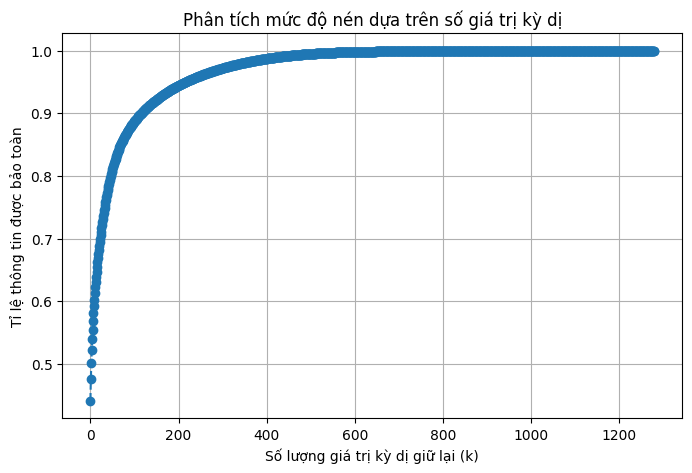

In [4]:
# Tính SVD
U, S, Vt = np.linalg.svd(image, full_matrices=False)

# Hiển thị giá trị kỳ dị quan trọng nhất
print("\n 10 Giá trị kỳ dị đầu tiên:")
print(S[:10])

# Tính toán tổng giá trị kỳ dị để đánh giá mức độ nén
total_energy = np.sum(S)
energy_ratios = np.cumsum(S) / total_energy

# Vẽ biểu đồ tích lũy giá trị kỳ dị
plt.figure(figsize=(8, 5))
plt.plot(energy_ratios, marker='o', linestyle='--')
plt.xlabel("Số lượng giá trị kỳ dị giữ lại (k)")
plt.ylabel("Tỉ lệ thông tin được bảo toàn")
plt.title("Phân tích mức độ nén dựa trên số giá trị kỳ dị")
plt.grid()
plt.show()


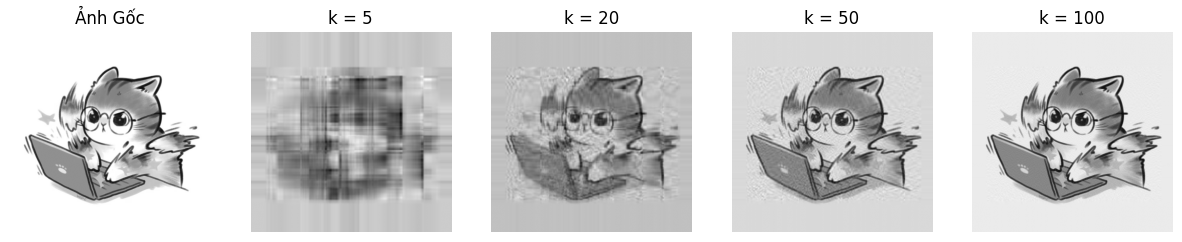

In [5]:
# Hàm tính toán MSE
def calculate_mse(original, compressed):
    return np.mean((original - compressed) ** 2)

# Hàm tính toán PSNR
def calculate_psnr(original, compressed):
    mse = calculate_mse(original, compressed)
    if mse == 0:
        return float('inf')  # Trường hợp ảnh không có lỗi
    max_pixel = 255.0
    return 10 * np.log10((max_pixel ** 2) / mse)
def compress_image(U, S, Vt, k):
    """Hàm tái tạo ảnh từ SVD với k giá trị kỳ dị"""
    Uk = U[:, :k]  # Chỉ lấy k cột đầu của U
    Sk = np.diag(S[:k])  # Chỉ lấy k phần tử đầu của Sigma
    Vtk = Vt[:k, :]  # Chỉ lấy k hàng đầu của Vt
    return np.dot(Uk, np.dot(Sk, Vtk))  # A_k = U_k * S_k * V_k^T

# Chọn các mức k để kiểm tra mức độ nén
k_values = [5, 20, 50, 100]

# Hiển thị ảnh với các mức nén khác nhau
fig, axes = plt.subplots(1, len(k_values) + 1, figsize=(15, 6))

# Ảnh gốc
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Ảnh Gốc")
axes[0].axis('off')

# Ảnh sau khi nén
for i, k in enumerate(k_values):
    compressed_img = compress_image(U, S, Vt, k)
    axes[i + 1].imshow(compressed_img, cmap='gray')
    axes[i + 1].set_title(f"k = {k}")
    axes[i + 1].axis('off')

plt.show()


In [6]:
# Kiểm tra dung lượng ảnh trước và sau nén
for k in k_values:
    # Tính số phần tử lưu trữ sau nén
    compressed_size_pixels = (m * k) + k + (n * k)
    
    # Tính dung lượng ảnh sau nén (giả sử mỗi phần tử lưu trữ 1 byte)
    compressed_size_bytes = compressed_size_pixels  # Đơn vị bytes (xấp xỉ)
    compression_ratio = original_size / compressed_size_bytes

    # Lưu ảnh nén ra file JPG để kiểm tra dung lượng thực tế
    compressed_image = compress_image(U, S, Vt, k)
    compressed_path = f'compressed_k{k}.jpeg'
    
   # Đảm bảo ảnh sau nén chỉ có 1 kênh grayscale trước khi lưu
    compressed_image = np.clip(compressed_image, 0, 255).astype(np.uint8)  # Đảm bảo dữ liệu hợp lệ

    # Không cần chuyển về BGR nữa, giữ nguyên ảnh xám
    cv2.imwrite(compressed_path, compressed_image, [cv2.IMWRITE_JPEG_QUALITY, 90])
    
    # Tính MSE và PSNR
    mse_value = calculate_mse(image, compressed_image)
    psnr_value = calculate_psnr(image, compressed_image)


    # Dung lượng file ảnh sau khi nén
    actual_compressed_size = os.path.getsize(compressed_path)

    print(f"\n📉 Đối với k = {k}:")
    print(f"  🔹 Kích thước ảnh gốc: {m * n} pixels")
    print(f"  🔹 Kích thước ảnh nén (ma trận): {compressed_size_pixels:.0f} pixels")
    print(f"  🔹 Dung lượng ảnh sau nén (ước lượng): {compressed_size_bytes / 1024:.2f} kB")
    print(f"  🔹 Dung lượng file thực tế: {actual_compressed_size / 1024:.2f} kB")
    print(f"  🔹 Tỉ lệ nén (ước lượng): {compression_ratio:.2f}x")
    print(f"  🔹 Tỉ lệ nén (thực tế): {original_size / actual_compressed_size:.2f}x")
    print(f"  🔹 MSE: {mse_value:.4f}")
    print(f"  🔹 PSNR: {psnr_value:.2f} dB")



📉 Đối với k = 5:
  🔹 Kích thước ảnh gốc: 1638400 pixels
  🔹 Kích thước ảnh nén (ma trận): 12805 pixels
  🔹 Dung lượng ảnh sau nén (ước lượng): 12.50 kB
  🔹 Dung lượng file thực tế: 80.03 kB
  🔹 Tỉ lệ nén (ước lượng): 6.08x
  🔹 Tỉ lệ nén (thực tế): 0.95x
  🔹 MSE: 54.0903
  🔹 PSNR: 30.80 dB

📉 Đối với k = 20:
  🔹 Kích thước ảnh gốc: 1638400 pixels
  🔹 Kích thước ảnh nén (ma trận): 51220 pixels
  🔹 Dung lượng ảnh sau nén (ước lượng): 50.02 kB
  🔹 Dung lượng file thực tế: 110.67 kB
  🔹 Tỉ lệ nén (ước lượng): 1.52x
  🔹 Tỉ lệ nén (thực tế): 0.69x
  🔹 MSE: 36.4690
  🔹 PSNR: 32.51 dB

📉 Đối với k = 50:
  🔹 Kích thước ảnh gốc: 1638400 pixels
  🔹 Kích thước ảnh nén (ma trận): 128050 pixels
  🔹 Dung lượng ảnh sau nén (ước lượng): 125.05 kB
  🔹 Dung lượng file thực tế: 130.15 kB
  🔹 Tỉ lệ nén (ước lượng): 0.61x
  🔹 Tỉ lệ nén (thực tế): 0.58x
  🔹 MSE: 21.7177
  🔹 PSNR: 34.76 dB

📉 Đối với k = 100:
  🔹 Kích thước ảnh gốc: 1638400 pixels
  🔹 Kích thước ảnh nén (ma trận): 256100 pixels
  🔹 Dung lượng